In [1]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz as eg
import graphviz
import matplotlib.pyplot as plt
import numpy as np

## 전처리

범주형 변수들을 get_dummies() 함수를 이용해 변환하여 기존 heart 데이터프레임에 저장합니다. <br/>
age(나이)의 경우 한 살, 한 살의 영향이 크지 않을 것이고 연령대별로 판단하는 것이 더 좋은 방법이라 생각하여 범주형변수로 변환 후 분석하였습니다.

In [2]:
heart=pd.read_csv('heart.csv')

In [3]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## age의 label을 먼저 만들어 준 뒤 pandas의cut 메소드를 사용, 범주형 변수로 변환합니다.

In [4]:
labels = ["{0} - {1}".format(i, i + 9) for i in range(20, 80, 10)]

In [5]:
labels

['20 - 29', '30 - 39', '40 - 49', '50 - 59', '60 - 69', '70 - 79']

In [6]:
heart['age_group'] = pd.cut(heart.age, range(20, 90, 10), right=False, labels=labels)

In [7]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,60 - 69
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,30 - 39
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,40 - 49
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,50 - 59
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,50 - 59


In [8]:
heart=pd.concat([heart,pd.get_dummies(heart.age_group)],axis=1)

In [9]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,ca,thal,target,age_group,20 - 29,30 - 39,40 - 49,50 - 59,60 - 69,70 - 79
0,63,1,3,145,233,1,0,150,0,2.3,...,0,1,1,60 - 69,0,0,0,0,1,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,2,1,30 - 39,0,1,0,0,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,2,1,40 - 49,0,0,1,0,0,0
3,56,1,1,120,236,0,1,178,0,0.8,...,0,2,1,50 - 59,0,0,0,1,0,0
4,57,0,0,120,354,0,1,163,1,0.6,...,0,2,1,50 - 59,0,0,0,1,0,0


## 모든 범주형 변수들을 더미변수로 변환 후 추가합니다 (단 열 이름이 겹치기 때문에 rename을 해가면서 추가해야합니다.)

In [10]:
heart=pd.concat([heart,pd.get_dummies(heart.sex)],axis=1)

In [11]:
heart=heart.rename({0:'female',1:'male'},axis='columns')

In [12]:
heart=pd.concat([heart,pd.get_dummies(heart.cp)],axis=1)

In [13]:
heart=heart.rename({0:'cp_1',1:'cp_2',2:'cp_3',3:'cp_4'},axis='columns')

In [14]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,40 - 49,50 - 59,60 - 69,70 - 79,female,male,cp_1,cp_2,cp_3,cp_4
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,0,1,0,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,...,0,0,0,0,0,1,0,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,1,0,0,1,0,0
3,56,1,1,120,236,0,1,178,0,0.8,...,0,1,0,0,0,1,0,1,0,0
4,57,0,0,120,354,0,1,163,1,0.6,...,0,1,0,0,1,0,1,0,0,0


In [15]:
heart=pd.concat([heart,pd.get_dummies(heart.fbs)],axis=1)

In [16]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,60 - 69,70 - 79,female,male,cp_1,cp_2,cp_3,cp_4,0,1
0,63,1,3,145,233,1,0,150,0,2.3,...,1,0,0,1,0,0,0,1,0,1
1,37,1,2,130,250,0,1,187,0,3.5,...,0,0,0,1,0,0,1,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,0,1,0,0,1,0,0,1,0
3,56,1,1,120,236,0,1,178,0,0.8,...,0,0,0,1,0,1,0,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,1,0,1,0,0,0,1,0


In [17]:
heart=heart.rename({0:'fbs_1',1:'fbs_2'},axis='columns')

In [18]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,60 - 69,70 - 79,female,male,cp_1,cp_2,cp_3,cp_4,fbs_1,fbs_2
0,63,1,3,145,233,1,0,150,0,2.3,...,1,0,0,1,0,0,0,1,0,1
1,37,1,2,130,250,0,1,187,0,3.5,...,0,0,0,1,0,0,1,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,0,1,0,0,1,0,0,1,0
3,56,1,1,120,236,0,1,178,0,0.8,...,0,0,0,1,0,1,0,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,1,0,1,0,0,0,1,0


In [19]:
heart=pd.concat([heart,pd.get_dummies(heart.restecg)],axis=1)

In [20]:
heart=heart.rename({0:'restecg_1',1:'restecg_2'},axis='columns')

In [21]:
heart=heart.rename({2:'restecg_3'},axis='columns')

In [22]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,male,cp_1,cp_2,cp_3,cp_4,fbs_1,fbs_2,restecg_1,restecg_2,restecg_3
0,63,1,3,145,233,1,0,150,0,2.3,...,1,0,0,0,1,0,1,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,1,0,0,1,0,1,0,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,0,1,0,0,1,0,1,0,0
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,1,0,0,1,0,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,...,0,1,0,0,0,1,0,0,1,0


In [23]:
heart=pd.concat([heart,pd.get_dummies(heart.exang)],axis=1)
heart=heart.rename({0:'exang_1',1:'exang_2'},axis='columns')

In [24]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_2,cp_3,cp_4,fbs_1,fbs_2,restecg_1,restecg_2,restecg_3,exang_1,exang_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,1,0,0,1,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,1,0,0,1,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,1,0,1,0,0,1,0
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,1,0,0,1,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,1,0,0,1,0,0,1


In [25]:
heart=pd.concat([heart,pd.get_dummies(heart.slope)],axis=1)
heart=heart.rename({0:'slope_1',1:'slope_2',2:'slope_3'},axis='columns')

In [26]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,fbs_1,fbs_2,restecg_1,restecg_2,restecg_3,exang_1,exang_2,slope_1,slope_2,slope_3
0,63,1,3,145,233,1,0,150,0,2.3,...,0,1,1,0,0,1,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,1,0,0,1,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,1,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,1,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,1,0,0,1,0,0,1,0,0,1


In [27]:
heart=pd.concat([heart,pd.get_dummies(heart.ca)],axis=1)
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,exang_1,exang_2,slope_1,slope_2,slope_3,0,1,2,3,4
0,63,1,3,145,233,1,0,150,0,2.3,...,1,0,1,0,0,1,0,0,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,1,0,1,0,0,1,0,0,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,1,1,0,0,0,0
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,1,1,0,0,0,0
4,57,0,0,120,354,0,1,163,1,0.6,...,0,1,0,0,1,1,0,0,0,0


In [28]:
heart=heart.rename({0:'ca_1',1:'ca_2',2:'ca_3',3:'ca_4',4:'ca_5'},axis='columns')

In [29]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,exang_1,exang_2,slope_1,slope_2,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5
0,63,1,3,145,233,1,0,150,0,2.3,...,1,0,1,0,0,1,0,0,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,1,0,1,0,0,1,0,0,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,1,1,0,0,0,0
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,1,1,0,0,0,0
4,57,0,0,120,354,0,1,163,1,0.6,...,0,1,0,0,1,1,0,0,0,0


In [30]:
heart=pd.concat([heart,pd.get_dummies(heart.thal)],axis=1)
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,0,1,2,3
0,63,1,3,145,233,1,0,150,0,2.3,...,0,1,0,0,0,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,0,0,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,1,0,0,0,0,0,0,1,0
3,56,1,1,120,236,0,1,178,0,0.8,...,1,1,0,0,0,0,0,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,...,1,1,0,0,0,0,0,0,1,0


In [31]:
heart=heart.rename({0:'thal_1',1:'thal_2',2:'thal_3',3:'thal_4'},axis='columns')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
0,63,1,3,145,233,1,0,150,0,2.3,...,0,1,0,0,0,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,0,0,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,1,0,0,0,0,0,0,1,0
3,56,1,1,120,236,0,1,178,0,0.8,...,1,1,0,0,0,0,0,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,...,1,1,0,0,0,0,0,0,1,0


## 범주형 변수로 변환 후 기존에 있던 필요없는 feature들을 제거합니다.

In [32]:
heart=heart.drop(['age','cp','sex','fbs','restecg','exang','slope','ca','thal','age_group'],axis=1)

In [33]:
RANDOM_STATE=11

## Train, test 데이터를 만듭니다.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(heart.drop(['target'],axis=1),heart.target,test_size=0.3,random_state=RANDOM_STATE)

In [35]:
X_train.head()

,trestbps,chol,thalach,oldpeak,20 - 29,30 - 39,40 - 49,50 - 59,60 - 69,70 - 79,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
20,135,234,161,0.5,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
265,112,212,132,0.1,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,1,0
45,120,325,172,0.2,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
230,108,243,152,0.0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0
29,130,197,152,1.2,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [36]:
y_train.head()

20     1
265    0
45     1
230    0
29     1
Name: target, dtype: int64

In [37]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

## Nearest Neighbor 의 두 가지 모델로 간단히 정확도를 테스트 해봤습니다.

In [39]:
for i in [NearestCentroid,KNeighborsClassifier]:
    clf=make_pipeline(i())
    clf.fit(X_train,y_train)
    print(clf.score(X_test,y_test))

0.6373626373626373
0.5714285714285714


In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

## 전처리 후 결과가 훨씬 좋음을 확인 할 수 있었습니다.

In [41]:
knn_std=Pipeline([('scaler',StandardScaler()),('knn',KNeighborsClassifier())])

In [42]:
knn_std.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))])

In [43]:
knn_std.score(X_test,y_test)

0.8021978021978022

In [44]:
knn_minmax=Pipeline([('scaler',MinMaxScaler()),('knn',KNeighborsClassifier())])

In [45]:
knn_minmax.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))])

In [46]:
knn_minmax.score(X_test,y_test)

0.8021978021978022

## 그리드서치를 사용하여 가장 좋은 파라미터를 찾습니다.

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
params = {'n_neighbors': np.arange(1, 20),'algorithm':['ball_tree', 'kd_tree'],'leaf_size':np.arange(20,40)}

In [53]:
knn_grid=GridSearchCV(KNeighborsClassifier(), params)

In [54]:
knn_grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]), 'algorithm': ['ball_tree', 'kd_tree'], 'leaf_size': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [55]:
knn_grid.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 20, 'n_neighbors': 11}

In [56]:
knn_grid.best_score_ 

0.660377358490566

## 최적의 파라미터를 찾은 후 얻은 정확도입니다. DecisionTree에 대해서도 같은 과정을 시행해줍니다.

In [57]:
knn=Pipeline([('scaler',StandardScaler()),('knn',KNeighborsClassifier(**knn_grid.best_params_))])

In [58]:
knn.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='ball_tree', leaf_size=20, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform'))])

In [59]:
knn.score(X_test,y_test)

0.8351648351648352

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier

In [61]:
for i in [DecisionTreeClassifier,ExtraTreeClassifier]:
    clf=make_pipeline(MinMaxScaler(),i())
    clf.fit(X_train,y_train)
    print(clf.score(X_test,y_test))

0.6373626373626373
0.6263736263736264


In [62]:
for i in [DecisionTreeClassifier,ExtraTreeClassifier]:
    clf=make_pipeline(StandardScaler(),i())
    clf.fit(X_train,y_train)
    print(clf.score(X_test,y_test))

0.6593406593406593
0.7252747252747253


In [63]:
params = {'max_depth': np.arange(5,21,5),'random_state':np.arange(1,10)}

In [64]:
tree_grid=GridSearchCV(DecisionTreeClassifier(), params)

In [65]:
tree_grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 5, 10, 15, 20]), 'random_state': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [66]:
tree_grid.best_params_

{'max_depth': 5, 'random_state': 7}

In [67]:
tree_grid.best_score_

0.7594339622641509

In [68]:
tree=Pipeline([('scaler',MinMaxScaler()),('tree',DecisionTreeClassifier(**tree_grid.best_params_))])

In [69]:
tree.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('tree', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=7,
            splitter='best'))])

In [70]:
tree.score(X_test,y_test)

0.6923076923076923

In [71]:
tree=DecisionTreeClassifier(**tree_grid.best_params_)

In [72]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=7,
            splitter='best')

In [73]:
tree.score(X_test,y_test)

0.6923076923076923

In [74]:
eg(tree,out_file='tree.dot')

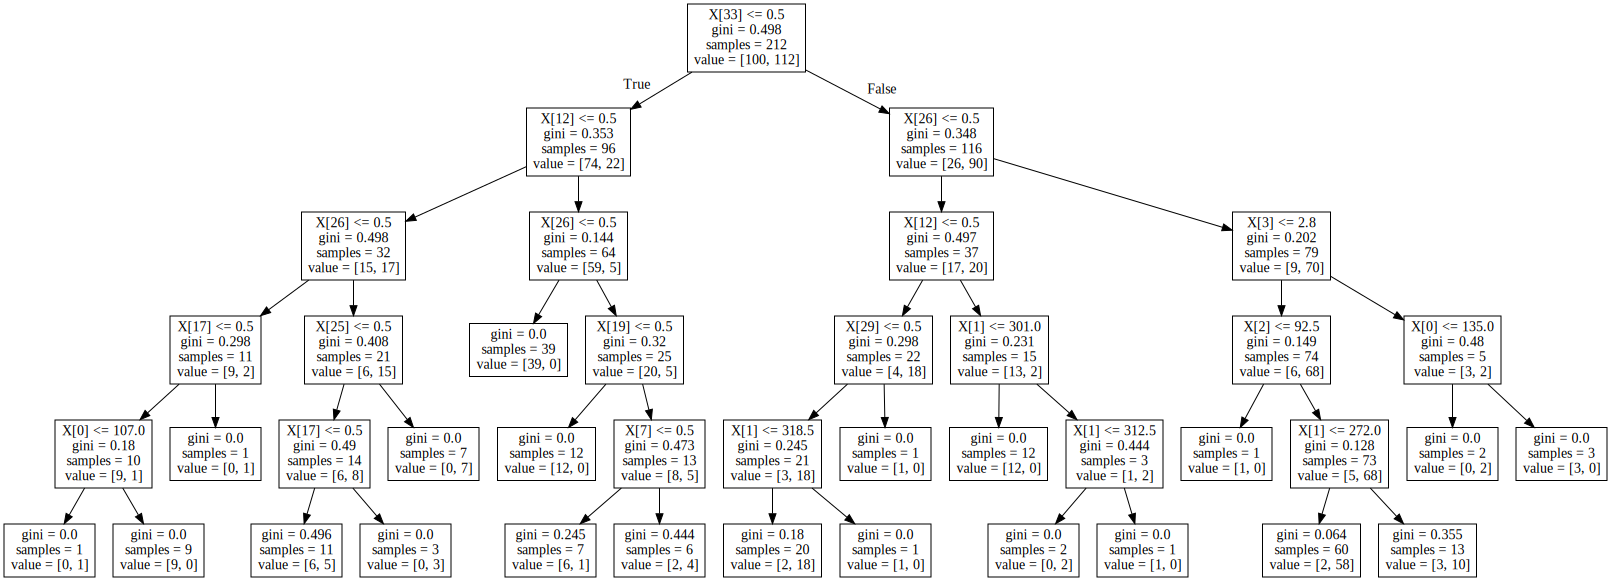

In [75]:
with open('tree.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))